<h2>HUXt examples.</h2>

This notebook contains several examples of how to use the HUXt, as described in Owens et al (2020).

In [1]:
import numpy as np
import HUXt as H
import astropy.units as u
import matplotlib.pyplot as plt

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x181c0676d30>)

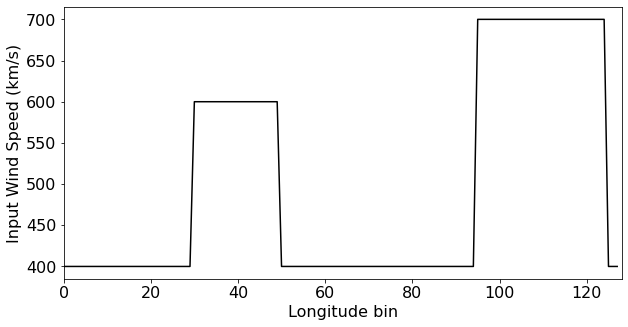

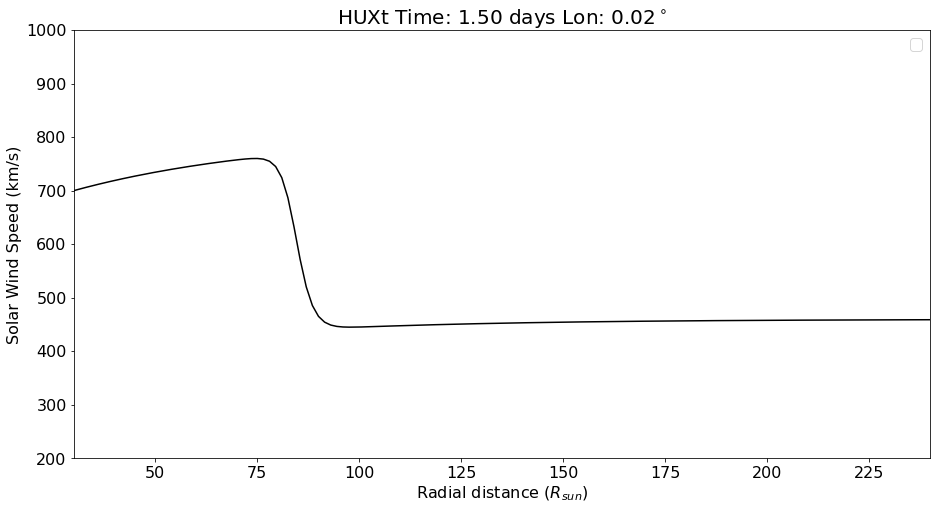

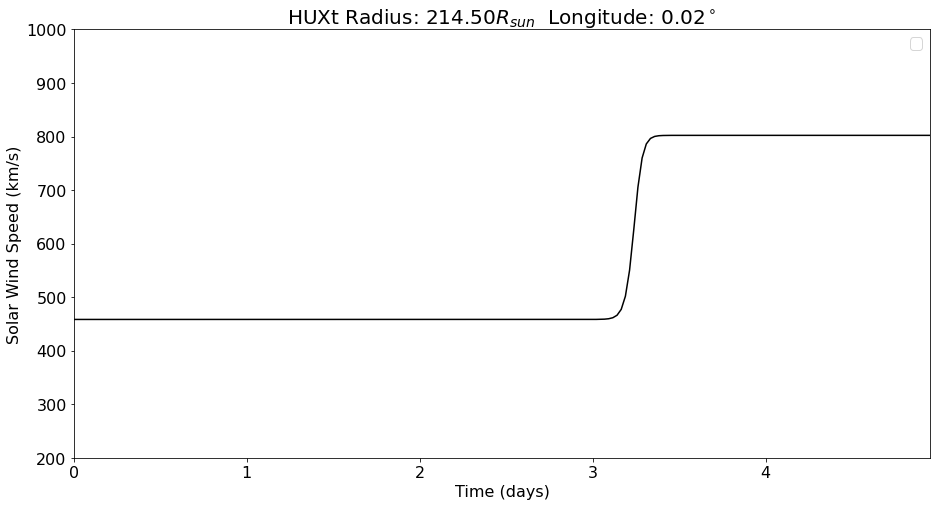

In [2]:
# Run HUXt in 1D (along one longitude) with user specified V boundary conditions and no CMEs, no magnetic field polarity
#########################################################################################################################

#Form longitudinal boundary conditions - background wind of 400 km/s with two fast streams.
v_boundary = np.ones(128) * 400 * (u.km/u.s)
v_boundary[30:50] = 600 * (u.km/u.s)
v_boundary[95:125] = 700 * (u.km/u.s)

# This boundary condition looks like
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(v_boundary,'k-')
ax.set_xlabel('Longitude bin')
ax.set_ylabel('Input Wind Speed (km/s)')
ax.set_xlim(0,128)

# Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step), looking at 0 longitude
model = H.HUXt(v_boundary=v_boundary, lon_out=0.0*u.deg, simtime=5*u.day, dt_scale=4)

# Solve these conditions, with no ConeCMEs added.
cme_list = []
model.solve(cme_list)

# Plot the radial profile of the ambient wind profile at a fixed time (in days). 
t = 1.5*u.day
model.plot_radial(t, lon=0.0,field='v')

# Plot the time series of the ambient wind profile at a fixed radius. 
r = 1.0*u.AU
model.plot_timeseries(r,lon=0.0,field='v')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x181c0924860>)

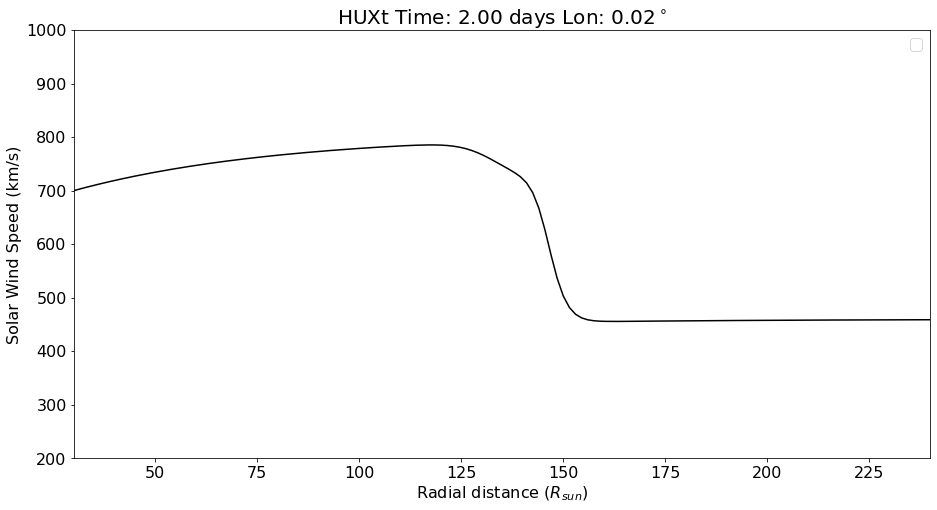

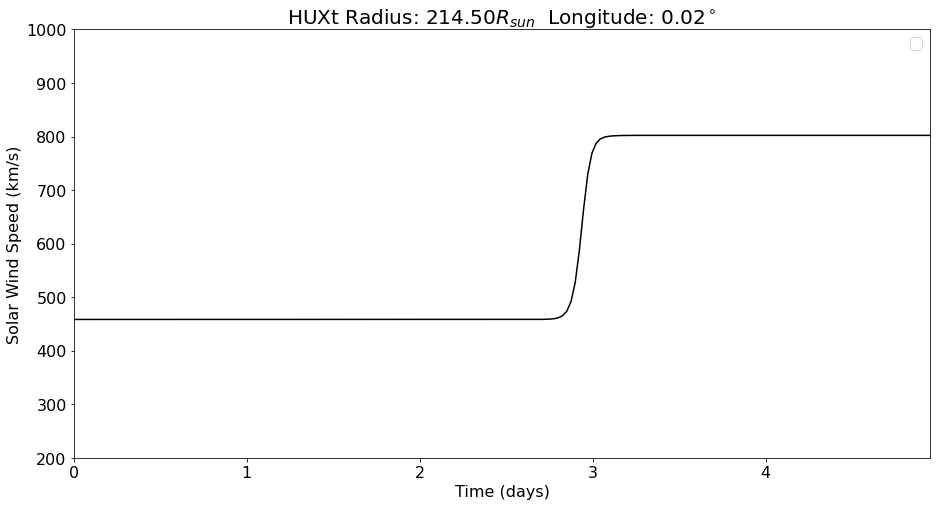

In [3]:
# Run HUXt in 1D (along one longitude) with user specified boundary conditions and single CME
############################################################################################

# Now lets run HUXt1D with the same background ambient wind and a cone cme.
# Launch the CME half a day after the simulation, at 0 longitude, 30 degree width, speed 850km/s and thickness=5 solar radii
cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, width=30*u.deg, v=1000*(u.km/u.s), thickness=5*u.solRad)
cme_list = [cme]

# Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step), looking at 0 longitude
model = H.HUXt(v_boundary=v_boundary, lon_out=0.0*u.deg, simtime=5*u.day, dt_scale=4)

# Run the model, and this time save the results to file.
model.solve(cme_list, save=True, tag='1d_conecme_test')

# Plot the radial profile and time series of both the ambient and ConeCME solutions at a fixed time (in days). 
# Save both to file as well. These are saved in HUXt>figures>HUXt1D
t = 2*u.day
model.plot_radial(t, lon=0.0*u.deg,field='v', save=True)
#model.plot_radial(t, field='both', save=True, tag='1d_cone_test_radial')

r = 1.0*u.AU
model.plot_timeseries(r, lon=0.0*u.deg,field='v', tag='1d_cone_test_radial')

Files already exist for CR2054


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2055cccb1d0>)

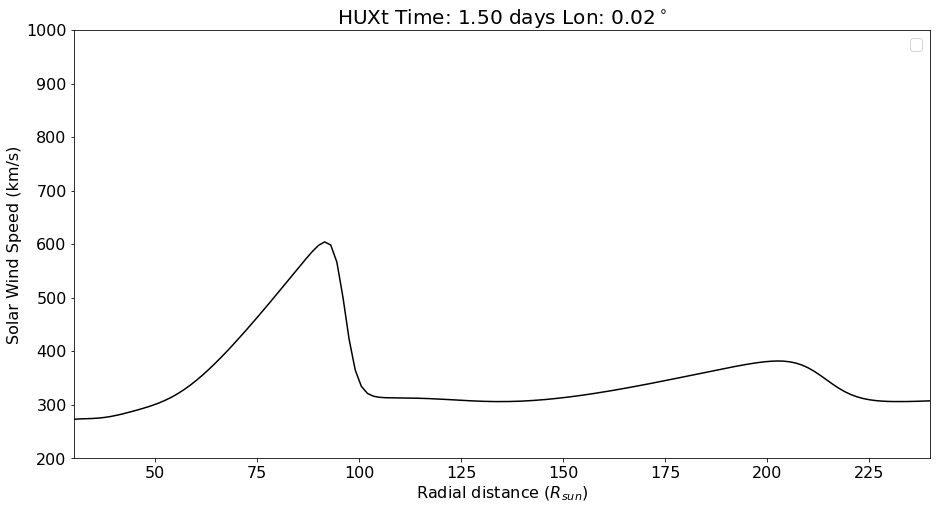

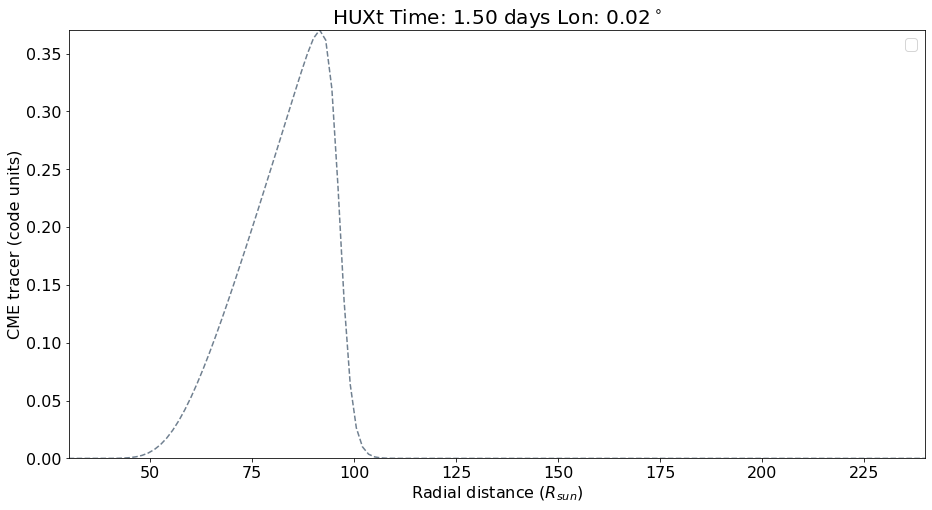

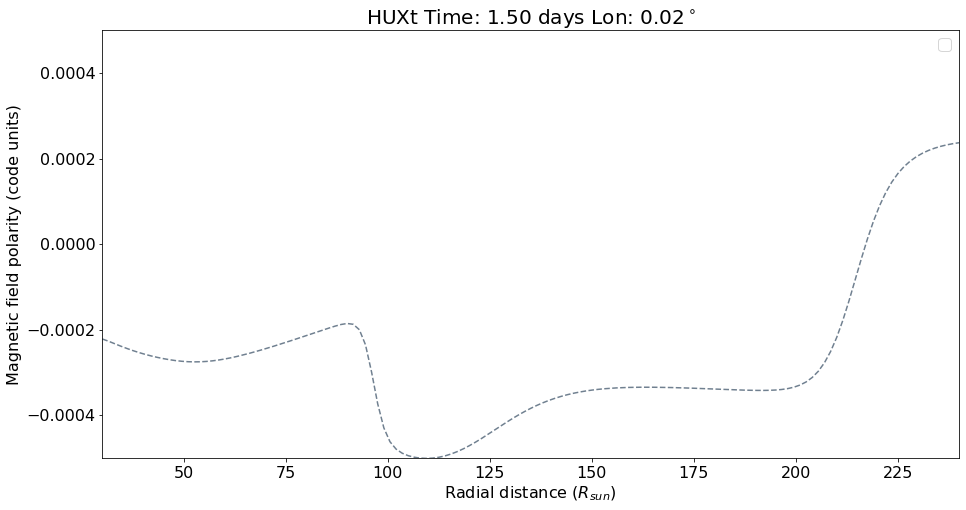

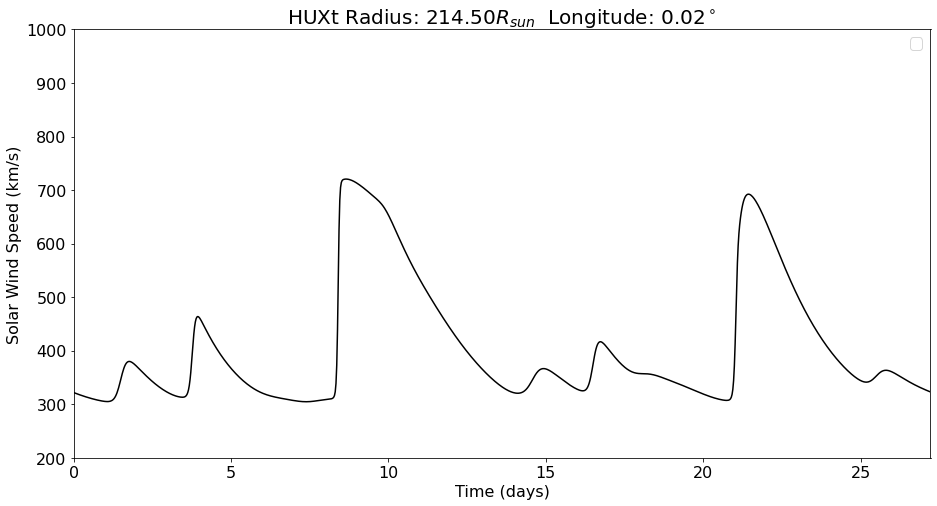

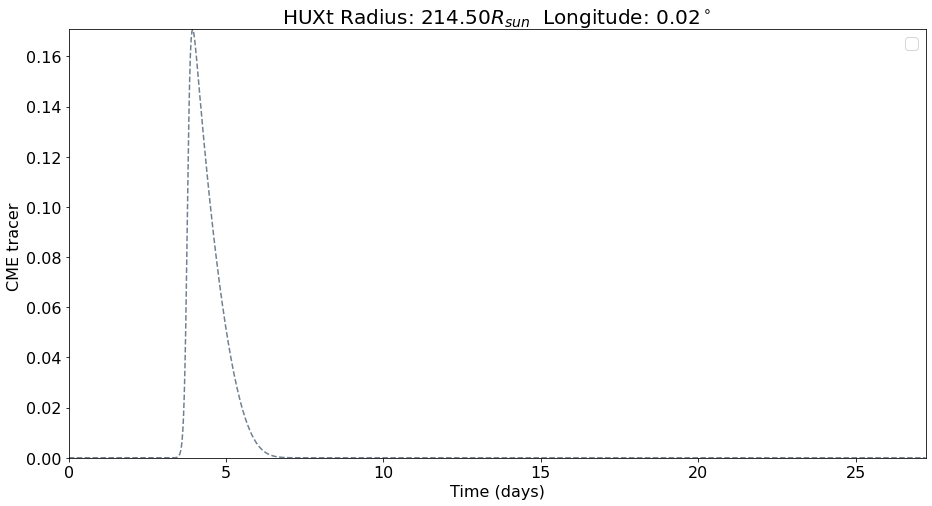

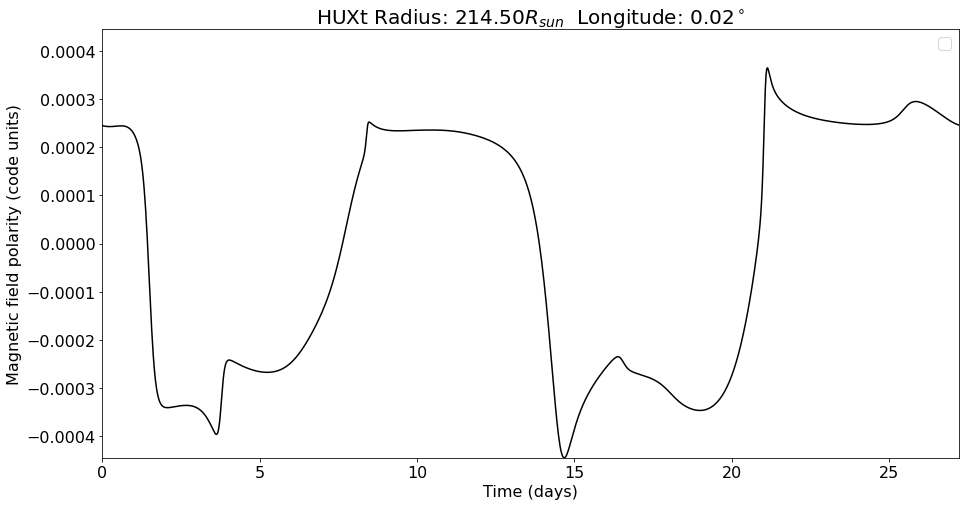

In [2]:
# Run HUXt with HelioMAS input
###############################################################################

#HUXt can be initiated MAS, by specifying a carrington rotation number
cr=2054
vr_in, br_in = H.Hin.get_MAS_long_profile(cr,0.0*u.deg)

model = H.HUXt(v_boundary=vr_in, cr_num=cr, br_boundary=br_in, lon_out=0.0*u.deg, simtime=27.27*u.day, dt_scale=4)

# Solve these conditions with a ConeCME.
cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, width=30*u.deg, v=1000*(u.km/u.s), thickness=10*u.solRad)
cme_list = [cme]
model.solve(cme_list)

# Plot the radial profile of the ambient wind solution at a fixed time (in days). 
t = 1.5*u.day
model.plot_radial(t, lon=0.0*u.deg,field='v')
model.plot_radial(t, lon=0.0*u.deg,field='cme')
model.plot_radial(t, lon=0.0*u.deg,field='br')

# Plot the time series of the ambient wind solution at a fixed radius. 
r = 1.0*u.AU
model.plot_timeseries(r, lon=0.0*u.deg,field='v')
model.plot_timeseries(r, lon=0.0*u.deg,field='cme')
model.plot_timeseries(r, lon=0.0*u.deg,field='br')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2055f176be0>)

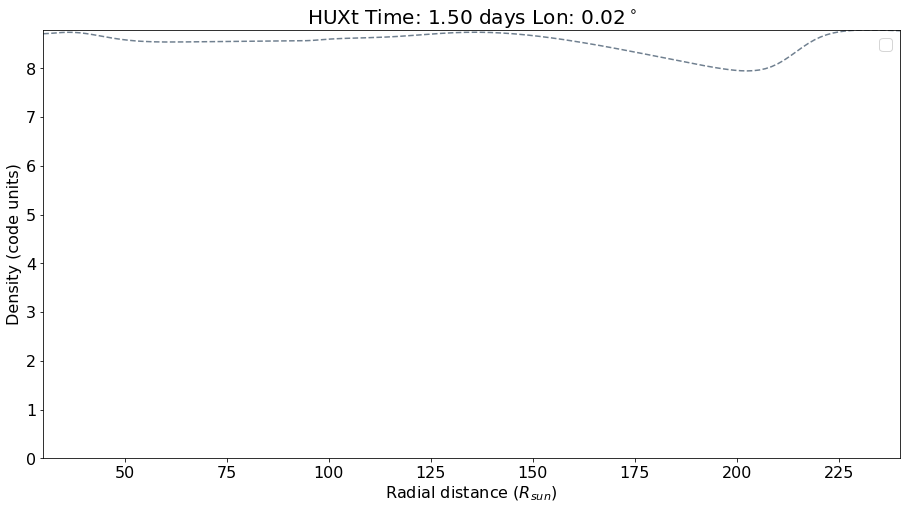

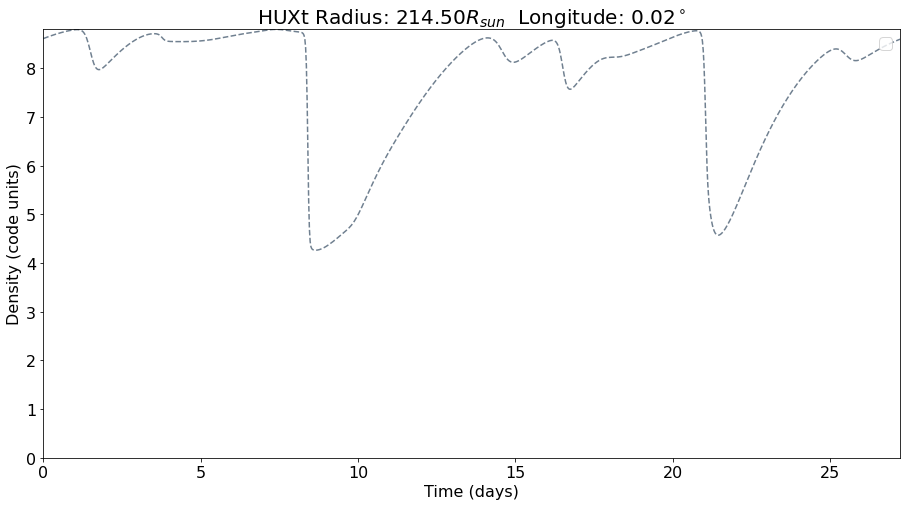

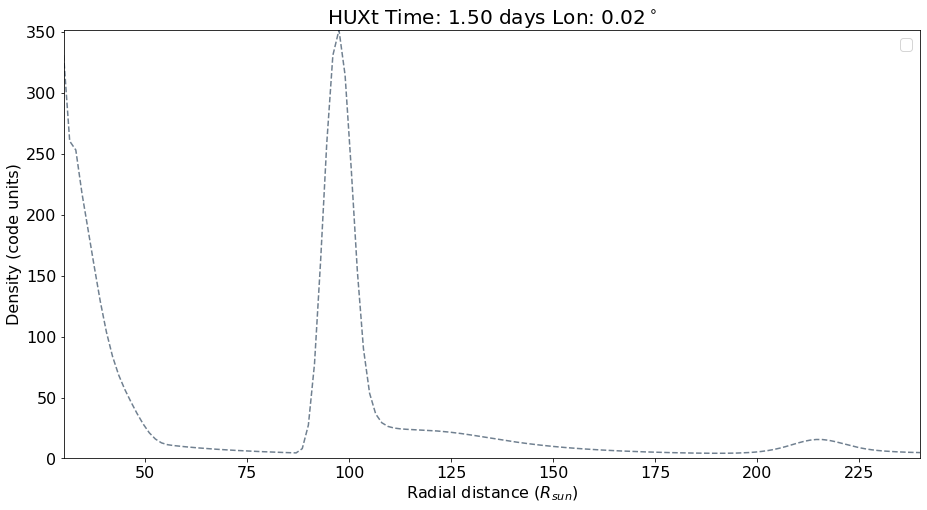

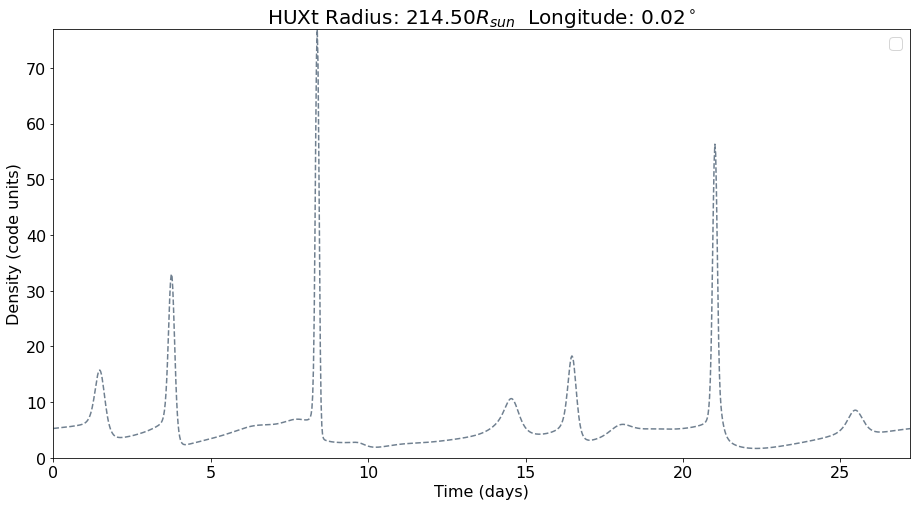

In [3]:
#plot the density, as simulated by a passive tracer within the model

t = 1.5*u.day
model.plot_radial(t, lon=0.0*u.deg,field='rho')
r = 1.0*u.AU
model.plot_timeseries(r, lon=0.0*u.deg,field='rho')

#now post-process the results to mimic compression at stream interactions and the 1/R^2 fall off.
model.rho_post_process()
model.plot_radial(t, lon=0.0*u.deg,field='rho')
model.plot_timeseries(r, lon=0.0*u.deg,field='rho')

Warning, multiple matches found, selecting match with greatest target overlap


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18ad4051048>)

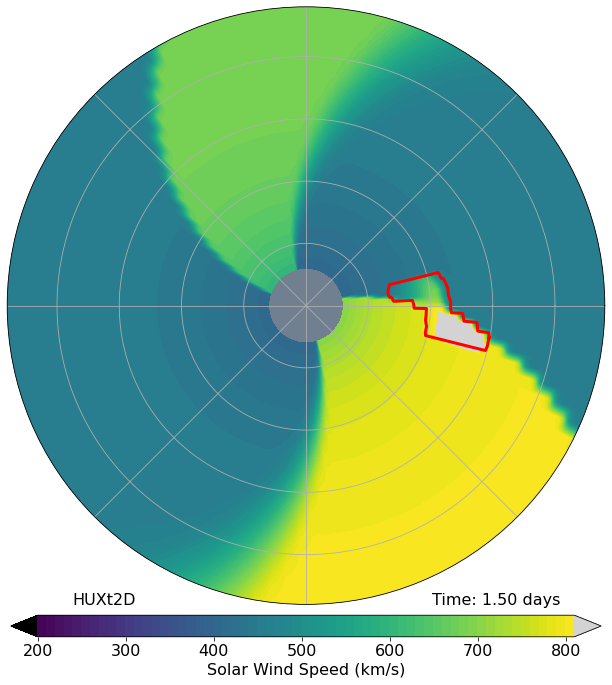

In [2]:
# Run HUXt at all longitudes with user specified Vr boundary conditions and single CME
###############################################################################

#Form boundary conditions - background wind of 400 km/s with two fast streams.
v_boundary = np.ones(128) * 400 * (u.km/u.s)
v_boundary[30:50] = 600 * (u.km/u.s)
v_boundary[95:125] = 700 * (u.km/u.s)
#add a CME
cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, width=30*u.deg, v=1000*(u.km/u.s), thickness=5*u.solRad)
cme_list = [cme]

# Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step)
model = H.HUXt(v_boundary=v_boundary, simtime=5*u.day, dt_scale=4)

model.solve(cme_list)

t_interest = 1.5*u.day
model.plot(t_interest, field='v')

In [3]:
# Animate a MP4 of the CME solution. These are saved in HUXt>figures
###############################################################################
model.animate('v', tag='cone_cme_test') # This takes about a minute too.

t:   0%|                                     | 0/240 [00:00<?, ?it/s, now=None]

Moviepy - Building video D:\Dropbox\python_repos\HUXt\figures\HUXt_CR9999_cone_cme_test_movie.mp4.
Moviepy - Writing video D:\Dropbox\python_repos\HUXt\figures\HUXt_CR9999_cone_cme_test_movie.mp4



Moviepy - Done !
Moviepy - video ready D:\Dropbox\python_repos\HUXt\figures\HUXt_CR9999_cone_cme_test_movie.mp4


In [5]:
# Model results can also be saved outside of the solve method.
###############################################################################

#teh default save only keeps the speed and CME tracer fields.
out_path = model.save(tag='cone_cme_test')
# And loaded back in with
model2, cme_list2 = H.load_HUXt_run(out_path)

#to save everything, use:
out_path = model.save_all(tag='cone_cme_test_all')
# And loaded back in with
model3, cme_list3 = H.load_HUXt_run(out_path)

No Br data, creating empty fields
No rho data, creating empty fields


Text(0, 0.5, 'Y ($R_{sun}$)')

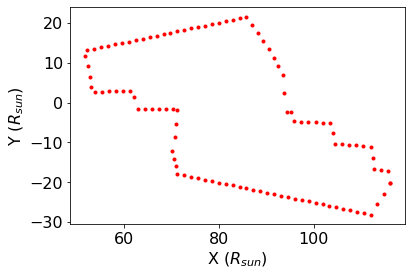

In [6]:
# Output the coordinates of the tracked CME boundary 
###############################################################################
cme = model2.cmes[0]
timestep = 50
rad = cme.coords[timestep]['r']
lon = cme.coords[timestep]['lon']
x = rad * np.cos(lon)
y = rad * np.sin(lon)

fig, ax = plt.subplots() # compare this with the boundary in the frame above.
ax.plot(x,y,'r.')
ax.set_xlabel('X ($R_{sun}$)')
ax.set_ylabel('Y ($R_{sun}$)')

Files already exist for CR2100
Warning, multiple matches found, selecting match with greatest target overlap


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18aa7b1cdd8>)

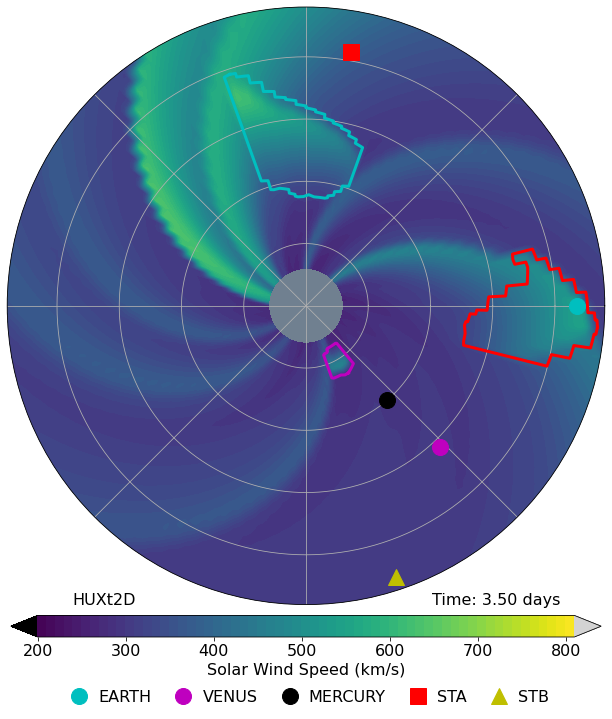

In [8]:
# HUXt can be run with multiple ConeCMEs.
###############################################################################

# Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step), looking at 0 longitude
cr=2100
vr_in, br_in = H.Hin.get_MAS_long_profile(cr,0.0*u.deg)
model = H.HUXt(v_boundary=vr_in, cr_num=cr, br_boundary=br_in, simtime=5*u.day, dt_scale=4)

daysec = 86400
times = [0.5*daysec, 1.5*daysec, 3*daysec]
speeds = [850, 1000, 700]
lons = [0, 90, 300]
widths = [30, 40, 20]
thickness = [5, 4, 2]
cme_list = []
for t, l, w, v, thick in zip(times, lons, widths, speeds, thickness):
    cme = H.ConeCME(t_launch=t*u.s, longitude=l*u.deg, width=w*u.deg, v=v*model.kms, thickness=thick*u.solRad)
    cme_list.append(cme)

model.solve(cme_list, save=True, tag='multi_cones') # This takes a minute or so to run. 
model.plot(3.5*u.day,field='v')
#model.animate('cme', tag='multi_cones')

Help on Observer in module HUXt object:

class Observer(builtins.object)
 |  A class returning the HEEQ and Carrington coordinates of a specified Planet or spacecraft, for a given set of times.
 |  The positions are linearly interpolated from a 2-hour resolution ephemeris that spans 1974-01-01 until 2020-01-01.
 |  Allowed bodies are Earth, Venus, Mercury, STEREO-A and STEREO-B.
 |  Attributes:
 |      body: String name of the planet or spacecraft.
 |      lat: HEEQ latitude of body at all values of time.
 |      lat_c: Carrington latitude of body at all values of time.
 |      lon: HEEQ longitude of body at all values of time.
 |      lon_c: Carrington longitude of body at all values of time.
 |      r: HEEQ radius of body at all values of time.
 |      r_c: Carrington radius of body at all values of time.
 |      time: Array of Astropy Times
 |  
 |  Methods defined here:
 |  
 |  __init__(self, body, times)
 |      :param body: String indicating which body to look up the positions o

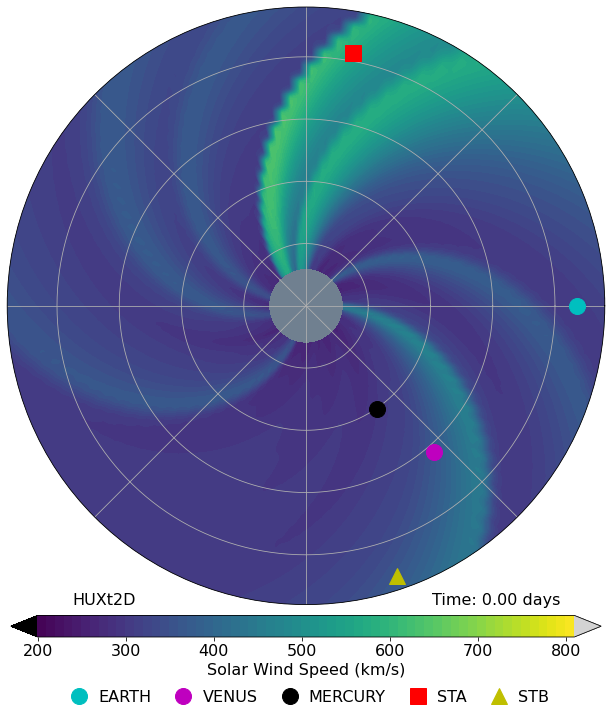

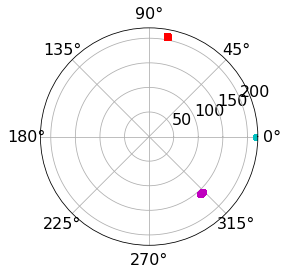

In [9]:
# There is also an ephemeris of the HEEQ and Carrington coordiates of Earth, Mercury, Venus, STEREO-A and STEREO-B
##################################################################################################################

# These are automatically plotted on model solutions derived from a particular Carrington rotation.
model.plot(model.time_out[0])

# You can retrieve a bodies position at each model timestep like:
earth = model.get_observer('earth')
sta = model.get_observer('sta')
venus = model.get_observer('venus')

# The bodies HEEQ and Carrington coordinates are attributes.
help(earth)

# So to plot them:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.plot(earth.lon, earth.r, 'co')
ax.plot(sta.lon, sta.r, 'rs')
ax.plot(venus.lon, venus.r, 'mo')

Files already exist for CR2120
Warning, multiple matches found, selecting match with greatest target overlap


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18ad45272b0>)

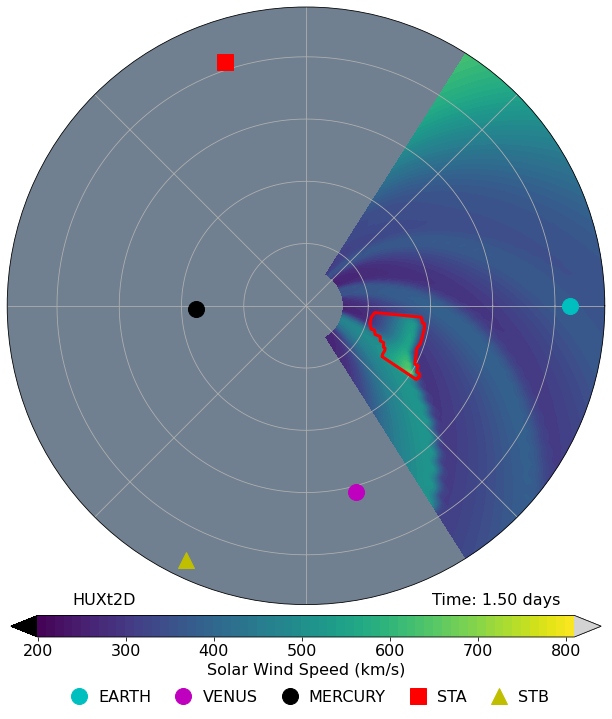

In [10]:
# HUXt can be run over a range of longitudes
############################################

# As HUXt is a purely radial model, it can be run over any set of longitudes. This could save disk-space and runtime if you are interested in large ensembles.
# This is done with the lon_start and lon_stop arguments.

cr=2120
vr_in, br_in = H.Hin.get_MAS_long_profile(cr,0.0*u.deg)
model = H.HUXt(v_boundary=vr_in, cr_num=cr, br_boundary=br_in, lon_start=300*u.deg, lon_stop=60*u.deg, simtime=5*u.day, dt_scale=4)

daysec = 86400
times = [0.5*daysec, 2*daysec]
speeds = [1000, 850]
lons = [-20, 20]
widths = [30, 30]
thickness = [8, 4]
cme_list = []
for t, l, w, v, thick in zip(times, lons, widths, speeds, thickness):
    cme = H.ConeCME(t_launch=t*u.s, longitude=l*u.deg, width=w*u.deg, v=v*model.kms, thickness=thick*u.solRad)
    cme_list.append(cme)

model.solve(cme_list, save=True, tag='multi_cones') # This takes a minute or so to run. 

t_interest = 1.5*u.day
model.plot(t_interest, field='v')

Files already exist for CR2120
360.0 deg 2012-02-06T06:43:39.692
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
270.0 deg 2012-02-13T02:46:16.813
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
180.0 deg 2012-02-19T22:48:18.568


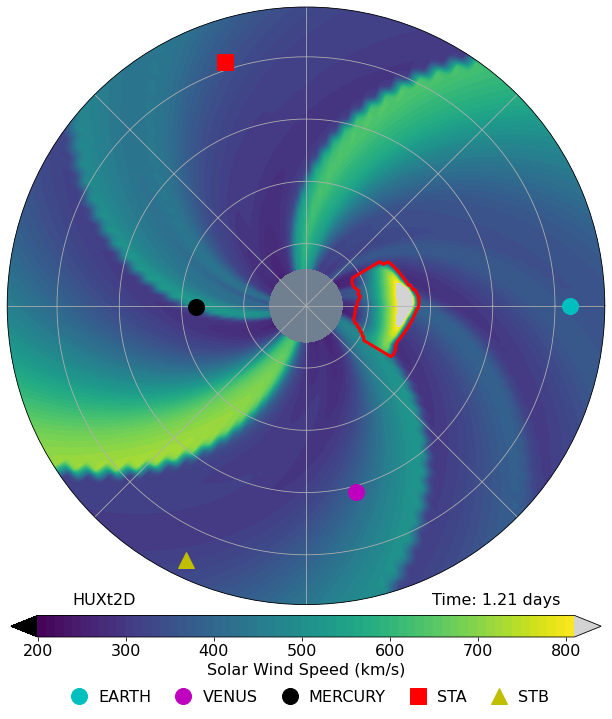

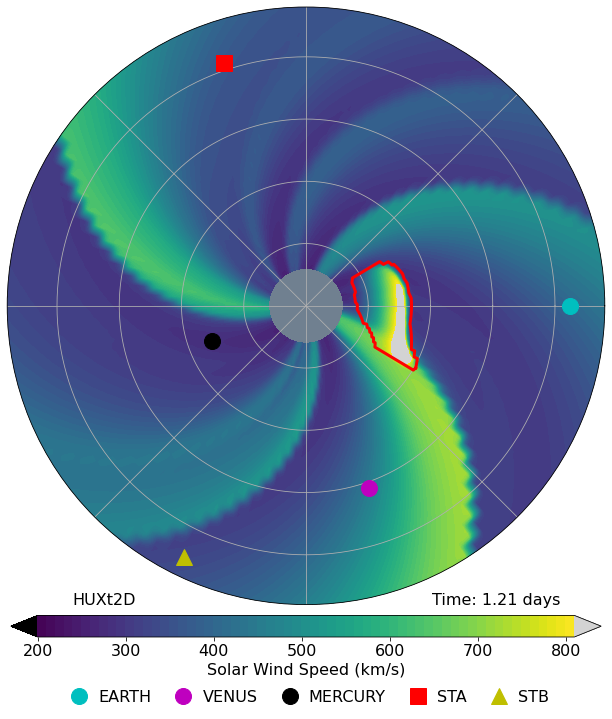

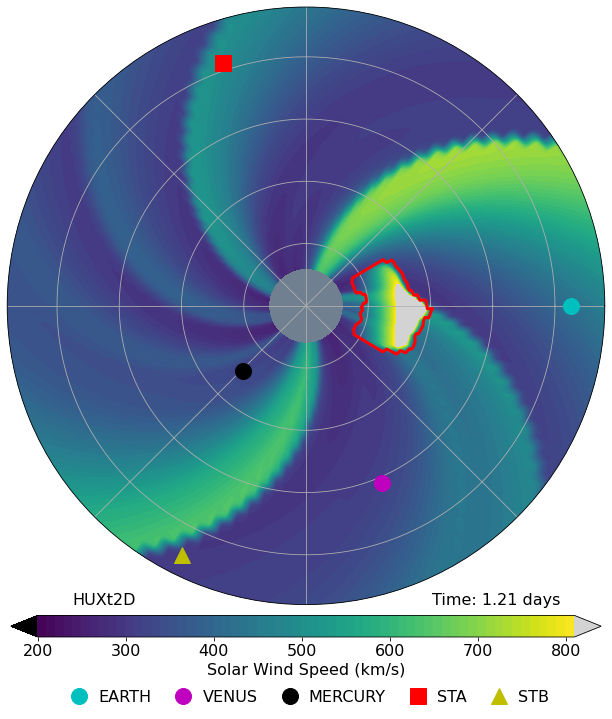

In [11]:
# Specifying the initial carrington longitude of Earth.
############################################

# With the cr_lon_init argument you can specify the initial carrington longitude of Earth at the models initialisation time.
# This sets the time_init attribute, so model times can be converted to UTC.
cr=2120
vr_in, br_in = H.Hin.get_MAS_long_profile(cr,0.0*u.deg)

for cr_lon in [360, 270, 180]:
    model = H.HUXt(v_boundary=vr_in, cr_num=cr, br_boundary=br_in, cr_lon_init=cr_lon*u.deg, simtime=5*u.day, dt_scale=4)
    cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, width=60*u.deg, v=1000*(u.km/u.s), thickness=5*u.solRad)
    model.solve([cme])
    cr_tag = 'cr_lon_{:03d}'.format(np.int32(cr_lon))
    model.plot(model.time_out[50], 'v', save=True, tag=cr_tag)
    print(model.cr_lon_init.to('deg'), model.time_init.isot)


In [12]:
# Most of the model parameters are attributes of the HUXt1D(2D) classes, so can be accessed like:
# Model time step from the CFL condition:
print(model.dt)
# Output model time step
print(model.dt_out)
# A list of all attributes is in the documentation
help(model)

521.775 s
2087.1 s
Help on HUXt in module HUXt object:

class HUXt(builtins.object)
 |  A class containing the HUXt model described in Owens et al. (2020, DOI: 10.1007/s11207-020-01605-3)
 |  
 |  Users must specify the solar wind speed boundary condition through either the v_boundary, or cr_num keyword
 |  arguments. Failure to do so defaults to a 400 km/s boundary. v_boundary takes precedence over cr_num, so specifying
 |  both results in only v_boundary being used.
 |  
 |  Model coordinate system is HEEQ radius and longitude.
 |  
 |  Attributes:
 |      cmes: A list of ConeCME instances used in the model solution.
 |      cr_num: If provided, this gives the Carrington rotation number of the selected period, else 9999.
 |      cr_lon_init: The initial Carrington longitude of Earth at the models initial timestep.
 |      daysec: seconds in a day.
 |      dlon: Longitudinal grid spacing (in radians)
 |      dr: Radial grid spacing (in km).
 |      dt: Model time step (in seconds), se

Files already exist for CR2054


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18ad3f6b128>)

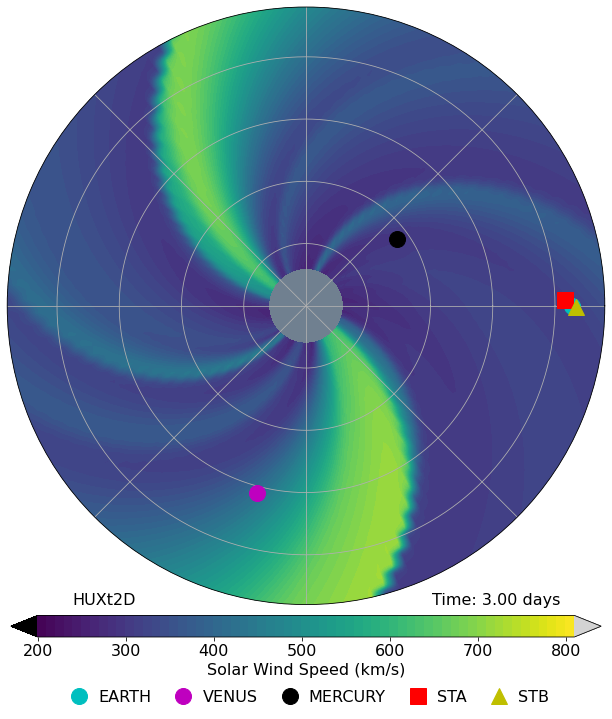

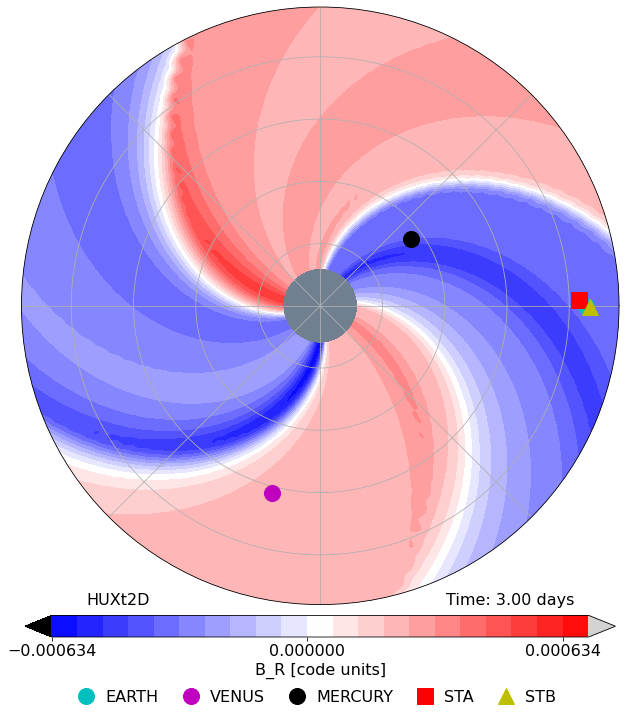

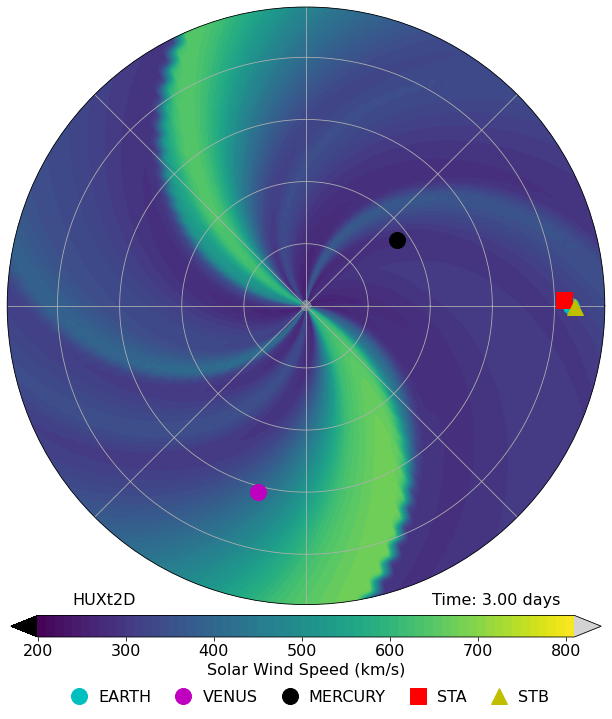

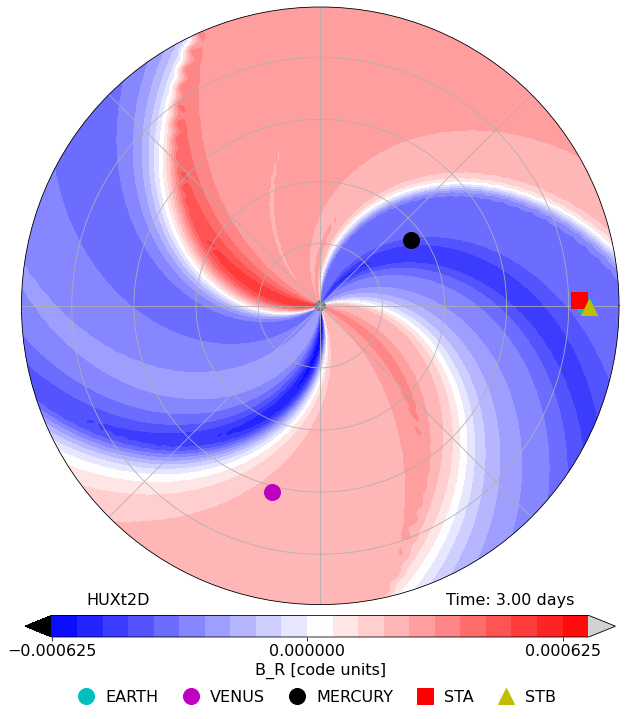

In [14]:
#While MAS solutions are at 30rS, these can be mapped inwards to initiate HUXt 
#at, e.g., 5 rS

#get the HUXt inputs
cr=2054
vr_in, br_in = H.Hin.get_MAS_long_profile(cr,0.0*u.deg)
#now run HUXt
model = H.HUXt(v_boundary=vr_in, cr_num=cr, br_boundary=br_in, latitude=0*u.deg,
               simtime=5*u.day, dt_scale=4)
model.solve([]) 

t_interest=3*u.day
model.plot(t_interest, field='v')
model.plot(t_interest, field='br')

#map the MAS values inwards from 30 rS to 5 rS
vr_5rs=H.Hin.map_v_boundary_inwards(vr_in, 30*u.solRad, 5*u.solRad)
br_5rs=H.Hin.map_ptracer_boundary_inwards(vr_in, 30*u.solRad, 5*u.solRad,br_in)

#now run HUXt
model = H.HUXt(v_boundary=vr_5rs, cr_num=cr, br_boundary=br_5rs,simtime=5*u.day, 
               latitude=0*u.deg, dt_scale=4, r_min=5*u.solRad)
model.solve([])

t_interest=3*u.day
model.plot(t_interest, field='v')
model.plot(t_interest, field='br')

Files already exist for CR2000


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18aa6729dd8>)

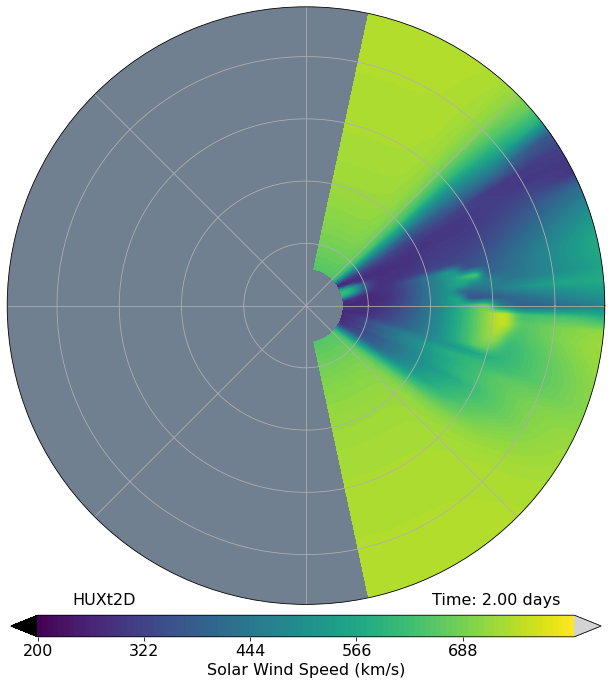

In [15]:
#set up a meridional cut run.
cr=2000
vmap, vlats, vlongs, bmap, blats, blongs=H.Hin.get_MAS_maps(cr)

model=H.Hlat.HUXt3d(cr_num=cr,v_map=vmap, v_map_lat=vlats, v_map_long=vlongs,
                    br_map=bmap, br_map_lat=blats, br_map_long=blongs,
                    latitude_max=90*u.deg, latitude_min=-90*u.deg, lon_out=0.0*u.deg,
                    simtime=27*u.day, r_min=30*u.solRad)

cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, latitude=0.0*u.deg,
                width=30*u.deg, v=1000*(u.km/u.s), thickness=5*u.solRad)

#run the model
cme_list=[cme]
model.solve(cme_list)

#plot and animate the output
model.plot(time=2*u.day, field='v')

#animate the solution - takes a minute or two
#model.animate('cme', tag='mercut_cme_test') 

Files already exist for CR2000


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18ad3e9b828>)

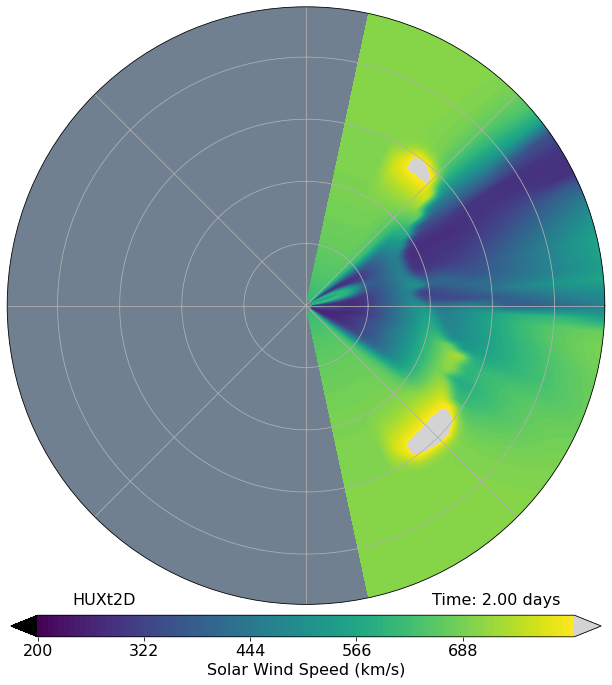

In [16]:
#map the speed inwards to rin
rin=5*u.solRad
cr=2000
vmap, vlats, vlongs, bmap, blats, blongs=H.Hin.get_MAS_maps(cr)

vinnermap=H.Hin.map_vmap_inwards(v_map=vmap, v_map_lat=vlats, v_map_long=vlongs, 
                        r_outer=30*u.solRad, r_inner=rin)
#map brinwards
brinnermap=H.Hin.map_ptracer_map_inwards(v_map=vmap, v_map_lat=vlats, v_map_long=vlongs,
                            ptracer_map=bmap, ptracer_map_lat=blats, ptracer_map_long=blongs,
                            r_outer=30*u.solRad, r_inner=rin)

#set up the model
model=H.Hlat.HUXt3d(cr_num=cr,v_map=vinnermap, v_map_lat=vlats, v_map_long=vlongs,
                    br_map=brinnermap, br_map_lat=blats, br_map_long=blongs,
                    latitude_max=90*u.deg, latitude_min=-90*u.deg, lon_out=0.0*u.deg,
                    simtime=27*u.day, r_min=rin)

cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, latitude=0.0*u.deg,
                width=30*u.deg, v=1000*(u.km/u.s), thickness=5*u.solRad)

#run the model
cme_list=[cme]
model.solve(cme_list)

#plot and animate the output
model.plot(time=2*u.day, field='v')
